# Snell's Law 

We are going to derive [Snell's Law based on the Principle of Least Time](https://www.physicslab.org/Document.aspx?doctype=3&filename=GeometricOptics_LeastTime.xml), using the `Equation` class.



The following schematic (thanks to [https://www.physicslab.org](https://www.physicslab.org/Document.aspx?doctype=3&filename=GeometricOptics_LeastTime.xml)) illustrates the geometric quantities mentioned above.

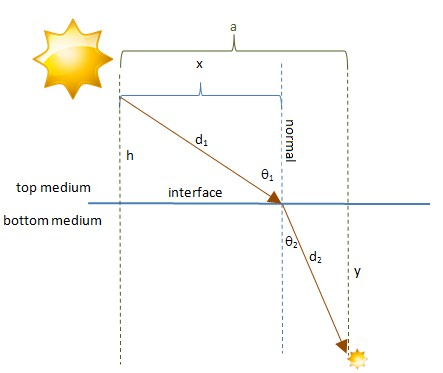

Let:

* $a, \, h, \, x, \, y$: geometric distances.
* $\theta_{1}, \, \theta_{2}$: angle of the ray of light with respect to the normal in medium 1 and 2.
* $d_{1}, \, d_{2}$: length travelled by light in medium 1 and 2.
* $v_{1}, \, v_{2}$: speed of ligth in medium 1 and 2.
* $t_{1}, \, t_{2}$: time of travel in medium 1 and 2.
* $n_{1}, \, n_{2}$: index of refraction in medium 1 and 2.
* $c$: speed of light in vacuum.

Note the definition of index of refraction:

$$
v = \frac{c}{n}
$$

where $v$ is the velocity, $c$ is the speed of light, $n$ is the index of refraction.

In [1]:
from sympy import *
from sympy_equation import Eqn, split_two_terms_add

a, h, x, y, d1, d2, theta1, theta2 = symbols("a, h, x, y, d1, d2, theta1, theta2", real=True, positive=True)
v1, v2, t1, t2, c, n1, n2 = symbols("v1, v2, t1, t2, c, n1, n2", real=True, positive=True)

From the schematic:

In [2]:
eq1 = Eqn(d1, sqrt(x**2 + h**2))
eq1

Equation(d1, sqrt(h**2 + x**2))

In [3]:
eq2 = Eqn(d2, sqrt((a - x)**2 + y**2))
eq2

Equation(d2, sqrt(y**2 + (a - x)**2))

Also:

In [4]:
eq3 = Eqn(d1 * cos(pi - pi/2 - theta1), x)
eq3

Equation(d1*sin(theta1), x)

In [5]:
eq4 = Eqn(d2 * sin(theta2), a - x)
eq4

Equation(d2*sin(theta2), a - x)

From these last two equations we can easily solve for the angles:

In [6]:
eq3 = (eq3 / d1).subs(eq1)
eq3

Equation(sin(theta1), x/sqrt(h**2 + x**2))

In [7]:
eq4 = (eq4 / d2).subs(eq2)
eq4

Equation(sin(theta2), (a - x)/sqrt(y**2 + (a - x)**2))

We also know the relationship between distance, speed and time:

In [8]:
eq5 = Eqn(d1, v1 * t1)
eq6 = Eqn(d2, v2 * t2)

Then, we can easily solve for the time it takes the ray of light to travel each medium:

In [9]:
eq7 = (eq5 / v1).swap.subs(eq1)
eq7

Equation(t1, sqrt(h**2 + x**2)/v1)

In [10]:
eq8 = (eq6 / v2).swap.subs(eq2)
eq8

Equation(t2, sqrt(y**2 + (a - x)**2)/v2)

The total time it takes the light to travel trough both mediums is:

In [11]:
total_time = (eq7 + eq8)
total_time

Equation(t1 + t2, sqrt(y**2 + (a - x)**2)/v2 + sqrt(h**2 + x**2)/v1)

[Fermat's Principle](https://en.wikipedia.org/wiki/Fermat%27s_principle), also known as the Principle of Least Time, states that the path taken by a ray between two given points is the path that can be traveled in the least time. So, we minimize the total time:

In [12]:
minimized = Eqn(total_time.rhs.diff(x), 0)
minimized

Equation((-a + x)/(v2*sqrt(y**2 + (a - x)**2)) + x/(v1*sqrt(h**2 + x**2)), 0)

We can easily recognize the terms of this addition as the ones shown in the RHS of `eq3, eq4`. There is a small problem though: the first term on the LHS has the sign swapped in comparison to `eq4`. Let's separate the terms of this addition on both sides:

In [13]:
minimized = split_two_terms_add(minimized).simplify()
minimized

Equation(x/(v1*sqrt(h**2 + x**2)), (a - x)/(v2*sqrt(y**2 + (a - x)**2)))

Now we can perform the substitutions in order to show the dependancy on the angles:

In [14]:
minimized = minimized.subs(eq4.swap).subs(eq3.swap)
minimized

Equation(sin(theta1)/v1, sin(theta2)/v2)

Then, we replace the velocities in order to visualize the indices of refraction:

In [15]:
idx_of_refrac = lambda n, v, c: Eqn(v, c / n)
minimized = minimized.subs(idx_of_refrac(n1, v1, c), idx_of_refrac(n2, v2, c))
minimized

Equation(n1*sin(theta1)/c, n2*sin(theta2)/c)

In [16]:
snell = minimized * c
snell

Equation(n1*sin(theta1), n2*sin(theta2))